In [7]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Woolridge/ceosal1.xls',header=None)

In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1281.119617,13.282297,6923.793301,17.184211,10.800478,61.803828,0.320574,0.220096,0.287081,0.172249,6.950386,8.292265
std,1372.345308,32.633921,10633.271159,8.518509,97.219400,68.177052,0.467818,0.415306,0.453486,0.378503,0.566374,1.013160
min,223.000000,-61.000000,175.200000,0.500000,-98.900000,-58.000000,0.000000,0.000000,0.000000,0.000000,5.407172,5.165928
25%,736.000000,-1.000000,2210.300000,12.400000,-21.200000,21.000000,0.000000,0.000000,0.000000,0.000000,6.601230,7.700883
50%,1039.000000,9.000000,3705.200000,15.500000,-3.000000,52.000000,0.000000,0.000000,0.000000,0.000000,6.946014,8.217492
75%,1407.000000,20.000000,7177.000000,20.000000,19.500000,81.000000,1.000000,0.000000,1.000000,0.000000,7.249215,8.878636
max,14822.000000,212.000000,97649.900000,56.300000,977.000000,418.000000,1.000000,1.000000,1.000000,1.000000,9.603868,11.489140


In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1095,20,27595.0,14.1,106.4,191,1,0,0,0,6.998509,10.225390
1,1001,32,9958.0,10.9,-30.6,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.9,23.5,-16.3,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.0,5.9,-25.7,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.2,13.8,-3.0,56,1,0,0,0,7.221105,9.988894


Note that the first column is the salary of the CEO's and 4th column is the ROE

First task is to setup a simple linear regression model explaining CEOs salaries interms of ROE.

$ salary_i = \hat{\beta_0} + \hat{\beta_1}*ROE_i+\epsilon_i $ 

OLS estimates of $\hat{\beta_0}$ and $\hat{\beta_1}$ are given by

1. $\hat{\beta_0} = \bar{y_i} - \hat{\beta_1}*\bar{x_i}$
2. $\hat{\beta_1} = \frac{cov(x_i,y_i)}{var(x_i)} = \frac{\sum_{i=1}^N (x_i-\bar{x_i})(y_i-\bar{y_i})}{\sum_{i=1}^N(x_i-\bar{x_i})^2}$

In [71]:
# Note that the first column is the salary of the CEOs and 4th column is the ROE

# First, we frame a simple regression model to explain salary with ROE
# salary_i = beta0 + beta1*ROE_i + error

# Extract the columns with salary and ROE 
salary_ROE = df.iloc[:,[0,3]]

# Set the column names for better readability
salary_ROE.set_axis(['salary','ROE'],axis=1,inplace=True)

# Construct a variance covariance matrix
var_cov_matrix = salary_ROE.cov()

#compute beta_1 and then beta_2
beta_1 = var_cov_matrix.loc['ROE'][0]/var_cov_matrix.loc['ROE'][1]
beta_0 = salary_ROE['salary'].mean()-beta_1*salary_ROE['ROE'].mean()

print (f'salary = {beta_0:.3f} + {beta_1:.3f} * ROE')

salary = 963.191 + 18.501 * ROE


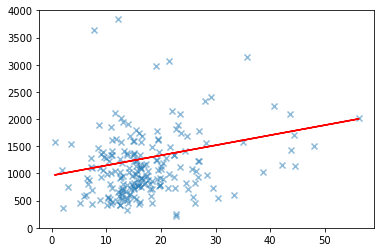

In [83]:
# Now, let us plot the model
import matplotlib.pyplot as plt

# Setting a ylim to ignore a couple of outliers spoiling the plot
plt.ylim(0,4000)
plt.scatter(salary_ROE['ROE'],salary_ROE['salary'],marker='x',alpha=0.5)
plt.plot(salary_ROE['ROE'],beta_0+beta_1*salary_ROE['ROE'],color='red')